In [85]:
import sys
sys.path.append('..')   

from app.data import dataset
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#explain dataframe
TVTROPES_DATA_FOLDER_PATH = Path("..","data", "tvtropes", "raw")
tropes = dataset.TVTropesDataset.from_csv_files(TVTROPES_DATA_FOLDER_PATH)
tropes.lit_tropes
tropes.lit_tropes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679618 entries, 0 to 679617
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  679618 non-null  int64 
 1   Title       679618 non-null  object
 2   Trope       679618 non-null  object
 3   Example     662150 non-null  object
 4   trope_id    679618 non-null  object
 5   title_id    679618 non-null  object
dtypes: int64(1), object(5)
memory usage: 31.1+ MB


In [5]:
# statistics about Example column text data (avg number of chars etc.)
tropes.lit_tropes["Example"].describe()

count                                                662150
unique                                               554323
top        Fighting Fantasy, a wildly popular British se...
freq                                                     68
Name: Example, dtype: object

In [6]:
tropes.lit_tropes["Example"].value_counts()

Example
Fighting Fantasy, a wildly popular British series that includes simple Tabletop RPG elements, with dice as randomizers.\n The Warlock of Firetop Mountain by Steve Jackson and Ian Livingstone, the first installment and the one that started it all.\n The Citadel of Chaos by Steve Jackson, second installment of the series.\n The Forest of Doom by Ian Livingstone, third installment of the series.\n Starship Traveller by Steve Jackson, fourth installment of the series and first foray into Sci-Fi, heavily inspired by Star Trek.\n City of Thieves by Ian Livingstone, 5th installment of the series.\n Deathtrap Dungeon by Ian Livingstone, 6th installment of the series.\n Island of the Lizard King by Ian Livingstone, 7th installment of the series.\n Scorpion Swamp by Steve Jackson,noteNot the same Jackson who co-wrote Firetop Mountain and wrote Citadel, but the US game developer 8th installment of the series. Features unusual, multiple alignment-based paths and endings.\n Caverns of the S

In [7]:
# check sample of non unique rows
tropes.lit_tropes.nunique()

Unnamed: 0    679618
Title          15495
Trope          27229
Example       554323
trope_id       27229
title_id       15495
dtype: int64

In [12]:
# check sample of unique rows
unique_lit_tropes_texts = tropes.lit_tropes["Example"].unique()
print(unique_lit_tropes_texts[5:10])
print(unique_lit_tropes_texts.shape)

[' When Tyler is explaining to  Kelley  how   Mr. Click died , she says, "Are you kidding me?", "Are you serious?", and "You can\'t be serious! Are you kidding me?".'
 ' Implied by the cab driver in A Bad Day For Voodoo. When Tyler is in the cab, he tells the cab driver that he needs to borrow his phone to call his mom, and when he hands him the phone, he jokes that shes probably already in his contacts list.\n'
 ' In A Bad Day For Voodoo,  Esmeralda, the maker of the voodoo dolls, explains to Tyler and Kelley that Adam is this, and will one day defeat the hobgoblins. When Kelley questions this, she explains that only the chosen one could have made the voodoo dolls so powerful.\n'
 ' After  Mr. Click\'s  leg comes off, Tyler and Adam go to Tyler\'s house to watch the news, and the reporter announces that   Mr. Click is dead . Adam shouts, "No!".'
 ' Mr. Click. He gives  Tyler  an undeserved F, and announces to the entire class when a kid gets a bad grade.']
(554324,)


In [3]:
#checking if subsets
# Check if lit_goodreads_match is a subset of lit_tropes
lit_goodreads_match_subset = tropes.lit_goodreads_match[['trope_id', 'title_id']].merge(tropes.lit_tropes[['trope_id', 'title_id']], how='left', indicator=True)
print("Is lit_goodreads_match a subset of lit_tropes?")
print(lit_goodreads_match_subset['_merge'].eq('both').all())

# Check if film_imdb_match is a subset of film_tropes
film_imdb_match_subset = tropes.film_imdb_match[['trope_id', 'title_id']].merge(tropes.film_tropes[['trope_id', 'title_id']], how='left', indicator=True)
print("\nIs film_imdb_match a subset of film_tropes?")
print(film_imdb_match_subset['_merge'].eq('both').all())

Is lit_goodreads_match a subset of lit_tropes?
False

Is film_imdb_match a subset of film_tropes?
True


#

# Environment sanity check
Testing whether CUDA/torch installation.

In [8]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("dunzhang/stella_en_1.5B_v5", trust_remote_code=True).cuda()

c:\Users\Fergons\Desktop\narana\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\Fergons\Desktop\narana\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Fergons\.cache\huggingface\hub\models--dunzhang--stella_en_1.5B_v5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python a

(2, 1024) (2, 1024)
tensor([[0.8179, 0.2958],
        [0.3194, 0.7854]])


In [131]:
sample = tropes.lit_tropes.where(tropes.lit_tropes.notna()).sample(20)
sample


,Unnamed: 0,Title,Trope,Example,trope_id,title_id
108201,109012,DayOfTheChoosing,WhereTheHellIsSpringfield,"There are no hints as to what state, country,...",t25928,lit2510
32263,32465,AngelsAndDemons,CentralTheme,"In the film, prejudice and traditionalism. W...",t03485,lit715
140467,141492,DumaKey,NormallyIWouldBeDeadNow,Edgar Freemantle and Jerome Wireman in Stephe...,t15560,lit3082
268098,270066,Larklight,DreadfulMusician,Larklight: Myrtle is one to the cactus creatu...,t06199,lit5811
567311,571838,TheRoadToMars,StraightMan,"Onstage, Lewis to Alex. Offstage, Carlton to ...",t21594,lit13035
51942,52293,BattlefrontTwilightCompany,SergeantRock,"Namir, Gadren and Brand.",t19874,lit1098
412823,416005,StarTrekTheNextGenerationRelaunch,UndyingLoyalty,"In Before Dishonor , Kadohata points a phase...",t24787,lit9503
612854,617759,TheWizardsOnWalnutStreet,IWorkAlone,Lampshaded by Grimsbane at the dinner table ...,t12017,lit14027
572285,576850,TheScarletPimpernel,UndergroundRailroad,The Scarlet Pimpernel is an early literary ex...,t24758,lit13134
153969,155101,Evensong,CulturedBadass,"The Breener; the clergy; and the Duke, now th...",t04913,lit3384


In [135]:
trope_ids = sample["Trope"].values
print(trope_ids)
# find the row with example not Nan for each of the tropes in trope_ids
matching = [tropes.lit_tropes.loc[tropes.lit_tropes['Trope'] == tid ].sample(1) for tid in trope_ids]
queries = [matching["Example"].values[0] for matching in matching]
queries_tropes = [matching["Trope"].values[0] for matching in matching]
queries

['WhereTheHellIsSpringfield' 'CentralTheme' 'NormallyIWouldBeDeadNow'
 'DreadfulMusician' 'StraightMan' 'SergeantRock' 'UndyingLoyalty'
 'IWorkAlone' 'UndergroundRailroad' 'CulturedBadass' 'Nanomachines'
 'BeMyValentine' 'TheOphelia' 'ThoseMagnificentFlyingMachines' 'GuyLiner'
 'TroublingUnchildlikeBehavior' 'ChinaTakesOverTheWorld' 'ShoutOut'
 'ChildhoodFriendRomance' 'WrittenByTheVictors']


[' The location of "Blackbury" is never specifically mentioned, but it is a decaying post-industrial town of the sort whose decay was accelerated in  The \'80s  by  Margaret Thatcher . It is usually thought of as being  Oop North   the name is a portmanteau of genuine Northern English placenames  Blackburn, Bury, Dewsbury. Interestingly enough, one of the local papers slso serves a neigghbouring town called  Grimethorpe , suggesting Johnny Maxwell and the Nomes live in the same universe not too far away.',
 ' Innocence   its value ,  its   various   problems , and  its   inevitable   loss .',
 ' Invoked in regards to Charles I, who "walked and talked Half an hour after his Head was cut off", which seems to say that king paradoxically survived his own decapitation. The implication is that this is a misunderstanding of the more sensible sentence "[Charles I] walked and talked. Half an hour after, his head was cut off."',
 ' Maureen, who has a powerful voice, but is quite tone deaf. Her a

<Axes: >

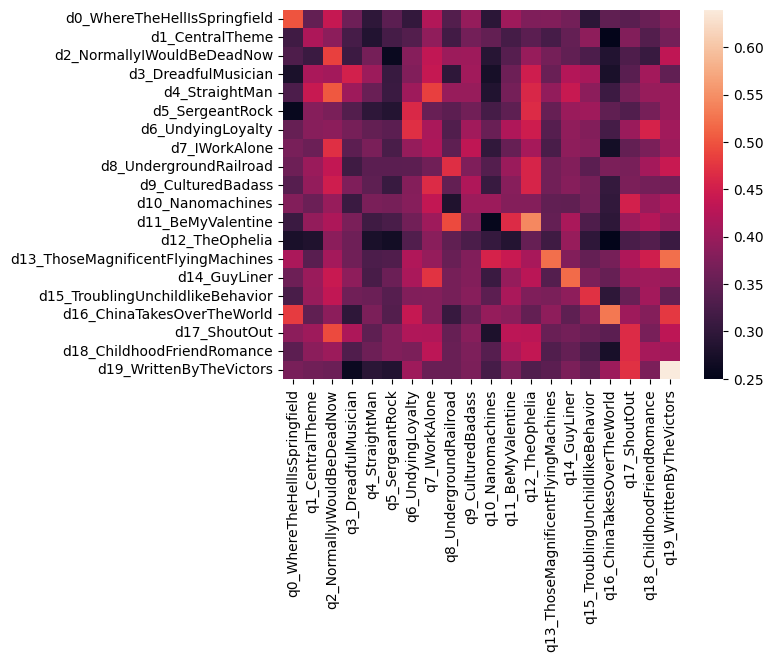

In [151]:
doc_embeddings = model.encode(sample["Example"].tolist())
# query_embeddings = model.encode(queries, prompt="Retrieve similar narratives that describe similar events, characters, and ideas to the following narrative query.")

query_embeddings = model.encode(queries, prompt="Encode similar narrative tropes not in the dataset")

similarities = model.similarity(query_embeddings, doc_embeddings)
# create plot of similarities q_1 ... q_n correspond to doc1 ... docn
q_names = [f"q{i}_{queries_tropes[i]}" for i in range(len(queries))]
d_names = [f"d{i}_{trope_ids[i]}" for i in range(len(doc_embeddings))]

# create a matrix of the similarities
sns.heatmap(similarities, xticklabels=q_names, yticklabels=d_names)

In [137]:
# compare query to max similarity doc for each query
max_similarities = [similarities[i].argmax().item() for i in range(len(similarities))]
pair_values = [f"Best match:{queries_tropes[i]} - {queries_tropes[max_similarities[i]]} Score: {similarities[i][max_similarities[i]]}\nQ: {queries[i]}\nD:{sample["Example"].values[max_similarities[i]]}" for i in range(len(similarities))]
for pair in pair_values:
    print(pair)

Best match:WhereTheHellIsSpringfield - WhereTheHellIsSpringfield Score: 0.5134251713752747
Q:  The location of "Blackbury" is never specifically mentioned, but it is a decaying post-industrial town of the sort whose decay was accelerated in  The '80s  by  Margaret Thatcher . It is usually thought of as being  Oop North   the name is a portmanteau of genuine Northern English placenames  Blackburn, Bury, Dewsbury. Interestingly enough, one of the local papers slso serves a neigghbouring town called  Grimethorpe , suggesting Johnny Maxwell and the Nomes live in the same universe not too far away.
D: There are no hints as to what state, country, or even continent that the story takes place in.  Given that All the Rest has traveled to multiple worlds, it may not even take place on Earth.
Best match:CentralTheme - CentralTheme Score: 0.431730180978775
Q:  Innocence   its value ,  its   various   problems , and  its   inevitable   loss .
D: In the film, prejudice and traditionalism.  Which th